# EDA para información entregada por Sernapesca

#### Introducción
Este Noteboopk corresponde al análisis exploratorio del archivo creado llamado "bussiness location", el cual contiene información de empresas del SSI, como la cantidad de trabajadores, ubicacion de casa matriz y oficinas, entre otros.
 
Resumen:
* Tiene una dimensión de (5402 rows x 36 )
* Este archivo es una tabla con la lista de empresas inscritas en el SII, entrega información de la cantidad de trabajadores de dicha empresa y también de su ubicación (de aquellos que pudieron ser georreferenciados aka %XX).
* Es solo para la Región de Los Lagos.

### Import libreries

In [1]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as cx

### Reading file "Ubicación de plantas"

In [3]:
%%time
business_location = pd.read_csv("../data/sii/business_location_filtered.csv")

CPU times: user 62.4 ms, sys: 184 µs, total: 62.6 ms
Wall time: 75.7 ms


In [4]:
business_location.shape

(5402, 36)

In [5]:
business_location.head()

,Unnamed: 0,Unnamed: 0.1,Año comercial,RUT,DV,Razón social,Tramo según ventas,Número de trabajadores dependientes informados,Fecha inicio de actividades vigente,Fecha término de giro,...,Calle,Numero,Bloque,Departamento,Villa Poblacion,Ciudad,Comuna_r,Region,lon,lat
0,3,237,2020,50249790,1,CHAVEZ ALMONACID RUBEN Y OTRA,1,0,1993-01-01,NaN,...,SANTA MARIA,752,NaN,NaN,NaN,NaN,PUERTO MONTT,X REGION LOS LAGOS,-72.951894,-41.470164
1,13,480,2020,50494660,6,HEIN MARTINEZ XIMENA PATRICIA Y OTRO,4,1,1993-01-01,NaN,...,SECTOR LA VEGA,NaN,NaN,NaN,NUEVA BRAUNAU,PUERTO VARAS,PUERTO VARAS,X REGION LOS LAGOS,0.000000,0.000000
2,14,480,2020,50494660,6,HEIN MARTINEZ XIMENA PATRICIA Y OTRO,4,1,1993-01-01,NaN,...,LA VEGA,S/N,NaN,NaN,NUEVA BRAUNAU,PUERTO VARAS,PUERTO VARAS,X REGION LOS LAGOS,0.000000,0.000000
3,23,647,2020,50652570,5,BERGER WESTERMAYER MARIA EMA Y OTRA,2,0,1993-10-01,NaN,...,PORTALES,1040,NaN,NaN,NaN,NaN,PUERTO MONTT,X REGION LOS LAGOS,-72.950678,-41.477231
4,24,672,2020,50681090,6,HENRIQUEZ MANCILLA GASTON LEONARDO Y OTRA,1,0,1994-04-05,NaN,...,SN LUIS POTOSI,32,NaN,NaN,ANAHUAC,NaN,PUERTO MONTT,X REGION LOS LAGOS,-72.976299,-41.485734


In [6]:
business_location.columns.to_list()

['Unnamed: 0',
 'Unnamed: 0.1',
 'Año comercial',
 'RUT',
 'DV',
 'Razón social',
 'Tramo según ventas',
 'Número de trabajadores dependientes informados',
 'Fecha inicio de actividades vigente',
 'Fecha término de giro',
 'Fecha primera inscripción de actividades',
 'Tipo término de giro',
 'Tipo de contribuyente',
 'Subtipo de contribuyente',
 'Tramo capital propio positivo',
 'Tramo capital propio negativo',
 'Rubro económico',
 'Subrubro económico',
 'Actividad económica',
 'Región',
 'Provincia',
 'Comuna_l',
 'Dv',
 'Vigencia',
 'Fecha',
 'Tipo Direccion',
 'Calle',
 'Numero',
 'Bloque',
 'Departamento',
 'Villa Poblacion',
 'Ciudad',
 'Comuna_r',
 'Region',
 'lon',
 'lat']

In [7]:
business_location.info

<bound method DataFrame.info of       Unnamed: 0  Unnamed: 0.1  Año comercial       RUT DV  \
0              3           237           2020  50249790  1   
1             13           480           2020  50494660  6   
2             14           480           2020  50494660  6   
3             23           647           2020  50652570  5   
4             24           672           2020  50681090  6   
...          ...           ...            ...       ... ..   
5397       34950        676590           2020  99577720  7   
5398       34954        676829           2020  99584000  6   
5399       34958        677093           2020  99591560  K   
5400       34968        677284           2020  99597250  6   
5401       34969        677284           2020  99597250  6   

                                           Razón social  Tramo según ventas  \
0                         CHAVEZ ALMONACID RUBEN Y OTRA                   1   
1                  HEIN MARTINEZ XIMENA PATRICIA Y OTRO          

In [8]:
business_location.describe()

,Unnamed: 0,Unnamed: 0.1,Año comercial,RUT,Tramo según ventas,Número de trabajadores dependientes informados,Tramo capital propio positivo,Tramo capital propio negativo,lon,lat
count,5402.000000,5402.000000,5402.0,5.402000e+03,5402.000000,5402.000000,2591.000000,1626.000000,5402.000000,5402.000000
mean,18828.593669,364495.731026,2020.0,7.794957e+07,4.968160,118.076638,7.334620,6.466790,-42.150218,-23.959370
std,10310.091711,203623.491677,0.0,5.781931e+06,3.461282,458.518843,2.548289,2.648972,36.134362,20.544703
min,3.000000,237.000000,2020.0,5.024979e+07,1.000000,0.000000,1.000000,1.000000,-74.120765,-43.619039
25%,9877.500000,188168.250000,2020.0,7.641885e+07,2.000000,0.000000,5.000000,5.000000,-73.001498,-41.471322
50%,18836.500000,360227.000000,2020.0,7.683614e+07,4.000000,1.000000,8.000000,7.000000,-72.912248,-40.949551
75%,28079.750000,551714.000000,2020.0,7.717102e+07,7.000000,10.000000,10.000000,9.000000,0.000000,0.000000
max,34969.000000,677284.000000,2020.0,9.959725e+07,13.000000,3462.000000,10.000000,10.000000,0.000000,0.000000


In [9]:
business_location.duplicated().sum()

0

In [10]:
business_location.isnull().sum()

Unnamed: 0                                           0
Unnamed: 0.1                                         0
Año comercial                                        0
RUT                                                  0
DV                                                   0
Razón social                                         0
Tramo según ventas                                   0
Número de trabajadores dependientes informados       0
Fecha inicio de actividades vigente                 25
Fecha término de giro                             5376
Fecha primera inscripción de actividades             0
Tipo término de giro                              5376
Tipo de contribuyente                                0
Subtipo de contribuyente                             0
Tramo capital propio positivo                     2811
Tramo capital propio negativo                     3776
Rubro económico                                      0
Subrubro económico                                   0
Actividad 

In [11]:
business_location.dtypes

Unnamed: 0                                          int64
Unnamed: 0.1                                        int64
Año comercial                                       int64
RUT                                                 int64
DV                                                 object
Razón social                                       object
Tramo según ventas                                  int64
Número de trabajadores dependientes informados      int64
Fecha inicio de actividades vigente                object
Fecha término de giro                              object
Fecha primera inscripción de actividades           object
Tipo término de giro                               object
Tipo de contribuyente                              object
Subtipo de contribuyente                           object
Tramo capital propio positivo                     float64
Tramo capital propio negativo                     float64
Rubro económico                                    object
Subrubro econó

In [12]:
business_location.columns.to_list()

['Unnamed: 0',
 'Unnamed: 0.1',
 'Año comercial',
 'RUT',
 'DV',
 'Razón social',
 'Tramo según ventas',
 'Número de trabajadores dependientes informados',
 'Fecha inicio de actividades vigente',
 'Fecha término de giro',
 'Fecha primera inscripción de actividades',
 'Tipo término de giro',
 'Tipo de contribuyente',
 'Subtipo de contribuyente',
 'Tramo capital propio positivo',
 'Tramo capital propio negativo',
 'Rubro económico',
 'Subrubro económico',
 'Actividad económica',
 'Región',
 'Provincia',
 'Comuna_l',
 'Dv',
 'Vigencia',
 'Fecha',
 'Tipo Direccion',
 'Calle',
 'Numero',
 'Bloque',
 'Departamento',
 'Villa Poblacion',
 'Ciudad',
 'Comuna_r',
 'Region',
 'lon',
 'lat']

In [19]:
business_location['Cd_Planta'].nunique()

207

In [15]:
#plants_location['Especie'].unique().tolist()
plants_location['Ciudad_'].unique().tolist()

['Puerto Montt',
 'Calbuco',
 'Ancud',
 'Castro',
 'Quellon',
 'Pto. Montt',
 'Puerto Varas',
 'Quemchi',
 'Llanquihue',
 'Chonchi',
 'Dalcahue',
 'Quellón',
 'Palena',
 'Maullin',
 'Maullín',
 'Carelmapu',
 'Queilen',
 'Las Quemas',
 'Puerto Octay',
 'Chaulinec',
 'Puyehue',
 'Osorno',
 'Muermos',
 'Contao']

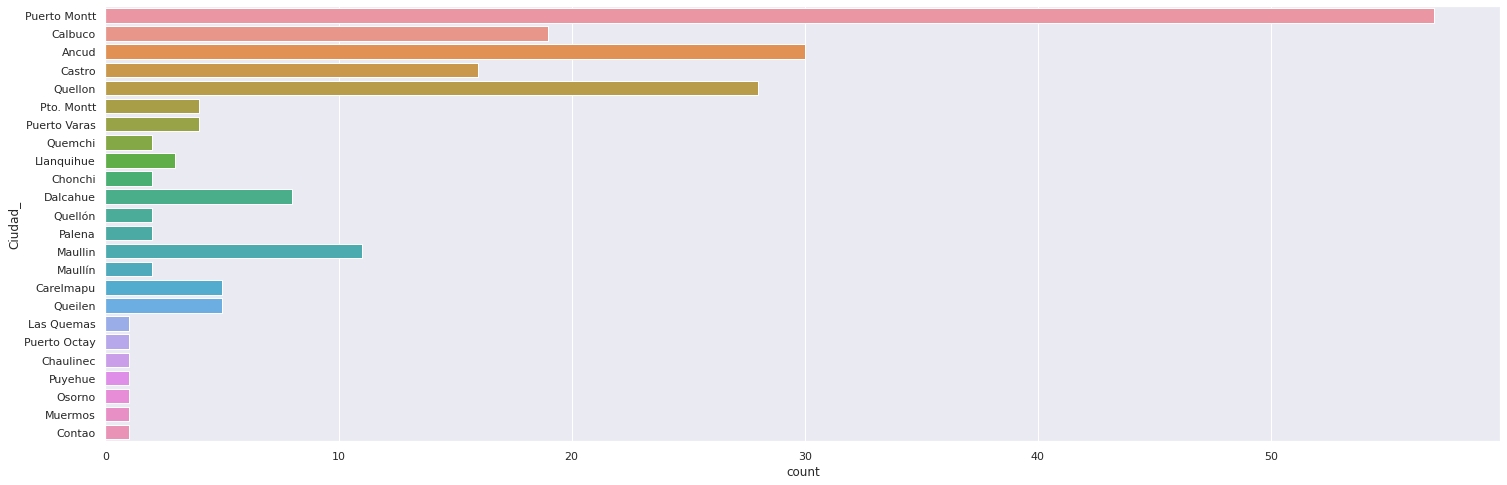

In [17]:
def count_clases(df, column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=df)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases(plants_location,'Ciudad_')

In [51]:
plants_location = plants_location[plants_location['X'].notna()]
plants_location = plants_location[plants_location['Y'].notna()]
plantas_gdf = gpd.GeoDataFrame(
    plants_location, geometry=gpd.points_from_xy(plants_location.Y, plants_location.X))


/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


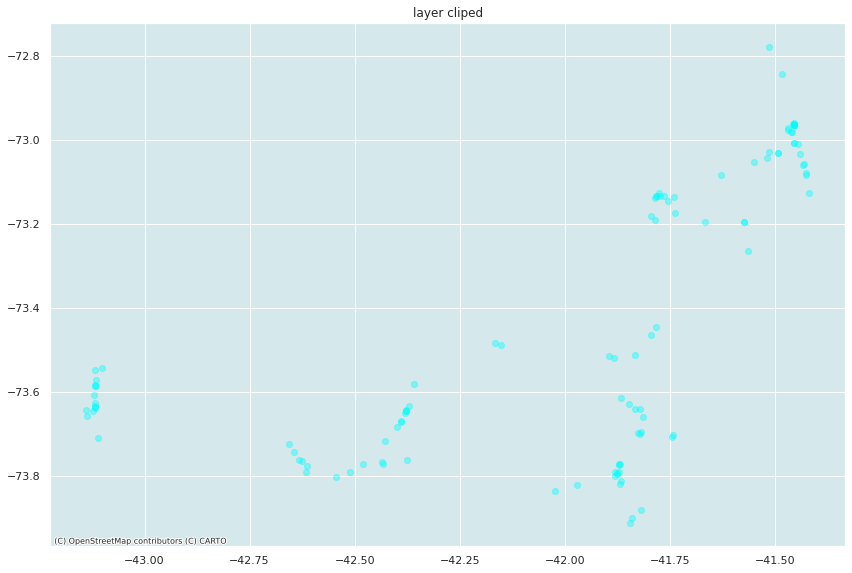

In [59]:
fig, ax = plt.subplots(figsize=(12,12))
plantas_gdf.plot(color='cyan',ax=ax,  alpha=0.4)
ax.ticklabel_format(style='plain')
ax.set_title('layer cliped')
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)
plt.tight_layout()
plt.show()

In [60]:
export_geojson = '../data/GIS/intermedios/plantas_gdf.geojson'
plantas_gdf.to_file(export_geojson)

DriverError: Failed to create directory ../data/GIS/intermedios/plantas_gdf.geojson for shapefile datastore.